In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Homework description

1. Take data from house pricing (kaggle)
2. Prepare metrics. Using bootstrap fit K=10 models with different hyper parameters
    - fit K linear regressions per several hyperparameters
    - K gradient bostings per several hyperparameters
    - K neural networks per several hyperparameters
1. For each model and hyperparameter setup estimate confidence interval.
2. Create a rate dashboard using avg metrics (train or validation avg metric). Take top-2 models and answer questions:
    - do for 1-st model train and validation intervals intersect each other?
    - do for 1-st and 2-nd model tr. intervals intersect each other?
    - do for 1-st and 2-dn mode val. intervals intersect each other?
1. Apply t-test to 1-st model (train-validation metrics). Apply same test for 1-st and 2-nd train metrics (for validation too)
2. What model is the best? Does it’s CI intersect other CI?


In [4]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

Features: simple, only floats and ints (data preprocessing was not part of this homework - and any other homework from this module of academy)

In [5]:
numeric_columns = [i for i, j in zip(train_data.columns, train_data.dtypes) if j in [np.int64, np.float64] and i not in ['SalePrice', 'Id']]
x_train = train_data[numeric_columns].fillna(-1)
x_test = test_data[numeric_columns].fillna(-1)

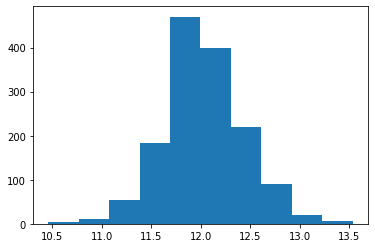

In [6]:
import matplotlib.pyplot as plt

y_train = np.log(train_data['SalePrice'])

_ = plt.hist(y_train)

Why target was logarithmized?
Because without logarithm, in test stage, for parametric models like linear regression or neural network, sale prices (target) will be smaller than 0

In [5]:
def rmse(a, b):
    return ((a - b) ** 2).mean() ** 0.5

**Linear Regression (Elastic Net)**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from tqdm import tqdm

K = 10

preds_train = []
preds_validation = []

lr_metrics = []

hyperparameters = [
    [1, 0.5],
    [1, 1],
    [1, 0],
    [1, 0.25],
    [1, 0.75],
    [10, 0.5],
    [10, 0.25],
    [10, 0.75],
    [10, 0],
    [10, 1]
]

for hyperparameters_i in tqdm(hyperparameters):
    for k in range(K):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=True, random_state=k)

        lr = ElasticNet(alpha=hyperparameters_i[0], l1_ratio=hyperparameters_i[1]).fit(x_tr, y_tr)

        preds_tr = lr.predict(x_tr)
        preds_val = lr.predict(x_val)

        preds_train.append(preds_tr)
        preds_validation.append(preds_val)

        train_mse = rmse(preds_tr, y_tr)
        val_mse = rmse(preds_val, y_val)

        lr_metrics.append({
            'algorithm' : f'ElasticNet: alpha={hyperparameters_i[0]}, l1_ratio={hyperparameters_i[1]}',
            'train_mse' : train_mse,
            'val_mse' : val_mse,
        })

 20%|██        | 2/10 [00:00<00:03,  2.47it/s]/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+01, tolerance: 1.785e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.577e+01, tolerance: 1.712e-02 Linear regression models with null weight for the l1 regularization term are more efficient

In [7]:
lr_metrics_df = pd.DataFrame(lr_metrics)
lr_metrics_df.head(20)

,algorithm,train_mse,val_mse
0,"ElasticNet: alpha=1, l1_ratio=0.5",0.169238,0.233481
1,"ElasticNet: alpha=1, l1_ratio=0.5",0.187198,0.169278
2,"ElasticNet: alpha=1, l1_ratio=0.5",0.156049,0.274354
3,"ElasticNet: alpha=1, l1_ratio=0.5",0.171529,0.233685
4,"ElasticNet: alpha=1, l1_ratio=0.5",0.187967,0.170356
5,"ElasticNet: alpha=1, l1_ratio=0.5",0.187491,0.166666
6,"ElasticNet: alpha=1, l1_ratio=0.5",0.183401,0.180795
7,"ElasticNet: alpha=1, l1_ratio=0.5",0.185447,0.174189
8,"ElasticNet: alpha=1, l1_ratio=0.5",0.182002,0.182845
9,"ElasticNet: alpha=1, l1_ratio=0.5",0.187622,0.169380


In [8]:
grouped_lr_metrics_df = lr_metrics_df.groupby(['algorithm']).agg(['mean', 'std', 'count'])
grouped_lr_metrics_df.head()

train_mse                   val_mse  \
                                        mean       std count      mean   
algorithm                                                                
ElasticNet: alpha=1, l1_ratio=0     0.155456  0.009898    10  0.172039   
ElasticNet: alpha=1, l1_ratio=0.25  0.176956  0.010732    10  0.193103   
ElasticNet: alpha=1, l1_ratio=0.5   0.179794  0.010727    10  0.195503   
ElasticNet: alpha=1, l1_ratio=0.75  0.183710  0.010807    10  0.199081   
ElasticNet: alpha=1, l1_ratio=1     0.188191  0.010875    10  0.203186   

                                                    
                                         std count  
algorithm                                           
ElasticNet: alpha=1, l1_ratio=0     0.036292    10  
ElasticNet: alpha=1, l1_ratio=0.25  0.036475    10  
ElasticNet: alpha=1, l1_ratio=0.5   0.037687    10  
ElasticNet: alpha=1, l1_ratio=0.75  0.038328    10  
ElasticNet: alpha=1, l1_ratio=1     0.038831    10

In [9]:
from scipy.stats import norm
a = 0.05
# 95% confident interval
xi = norm.ppf(1 - a / 2)

lr_confidence_intervals_train = []
lr_confidence_intervals_val = []

for i in range(len(hyperparameters)):
    lr_confidence_intervals_train.append(
        np.array([-1, 1]) * xi * grouped_lr_metrics_df.iloc[i]['train_mse']['std'] / grouped_lr_metrics_df.iloc[i]['train_mse']['count'] ** 0.5 + grouped_lr_metrics_df.iloc[i]['train_mse']['mean']
    )

    lr_confidence_intervals_val.append(
        np.array([-1, 1]) * xi * grouped_lr_metrics_df.iloc[i]['val_mse']['std'] / grouped_lr_metrics_df.iloc[i]['val_mse']['count'] ** 0.5 + grouped_lr_metrics_df.iloc[i]['val_mse']['mean']
    )

In [10]:
lr_confidence_intervals_train

[array([0.1493212 , 0.16159058]),
 array([0.17030459, 0.18360807]),
 array([0.17314599, 0.18644273]),
 array([0.17701201, 0.19040881]),
 array([0.18145063, 0.19493172]),
 array([0.16494842, 0.17812757]),
 array([0.20638608, 0.21890269]),
 array([0.21622661, 0.23172625]),
 array([0.21842654, 0.23372508]),
 array([0.22086573, 0.23595126])]

In [11]:
lr_confidence_intervals_val

[array([0.14954598, 0.19453292]),
 array([0.17049553, 0.21570981]),
 array([0.17214484, 0.21886088]),
 array([0.17532625, 0.22283672]),
 array([0.1791184 , 0.22725343]),
 array([0.16655671, 0.21117228]),
 array([0.20317729, 0.2527156 ]),
 array([0.21631701, 0.26053072]),
 array([0.21869524, 0.26032711]),
 array([0.22146609, 0.26073999])]

In [12]:
grouped_lr_metrics_df['conf_inter_train_left'] = [lr_confidence_intervals_train_el[0] for lr_confidence_intervals_train_el in lr_confidence_intervals_train]
grouped_lr_metrics_df['conf_inter_train_right'] = [lr_confidence_intervals_train_el[1] for lr_confidence_intervals_train_el in lr_confidence_intervals_train]
grouped_lr_metrics_df['conf_inter_val_left'] = [lr_confidence_intervals_val_el[0] for lr_confidence_intervals_val_el in lr_confidence_intervals_val]
grouped_lr_metrics_df['conf_inter_val_right'] = [lr_confidence_intervals_val_el[1] for lr_confidence_intervals_val_el in lr_confidence_intervals_val]

Confidence intervals help to estimate quality of metrics and build statistical tests

In [13]:
grouped_lr_metrics_df

train_mse                   val_mse  \
                                         mean       std count      mean   
algorithm                                                                 
ElasticNet: alpha=1, l1_ratio=0      0.155456  0.009898    10  0.172039   
ElasticNet: alpha=1, l1_ratio=0.25   0.176956  0.010732    10  0.193103   
ElasticNet: alpha=1, l1_ratio=0.5    0.179794  0.010727    10  0.195503   
ElasticNet: alpha=1, l1_ratio=0.75   0.183710  0.010807    10  0.199081   
ElasticNet: alpha=1, l1_ratio=1      0.188191  0.010875    10  0.203186   
ElasticNet: alpha=10, l1_ratio=0     0.171538  0.010632    10  0.188864   
ElasticNet: alpha=10, l1_ratio=0.25  0.212644  0.010097    10  0.227946   
ElasticNet: alpha=10, l1_ratio=0.5   0.223976  0.012504    10  0.238424   
ElasticNet: alpha=10, l1_ratio=0.75  0.226076  0.012342    10  0.239511   
ElasticNet: alpha=10, l1_ratio=1     0.228408  0.012170    10  0.241103   

                                                    conf_inter_train_left  \
                                          std count                         
algorithm                                                                   
ElasticNet: alpha=1, l1_ratio=0      0.036292    10              0.149321   
ElasticNet: alpha=1, l1_ratio=0.25   0.036475    10              0.170305   
ElasticNet: alpha=1, l1_ratio=0.5    0.037687    10              0.173146   
ElasticNet: alpha=1, l1_ratio=0.75   0.038328    10              0.177012   
ElasticNet: alpha=1, l1_ratio=1      0.038831    10              0.181451   
ElasticNet: alpha=10, l1_ratio=0     0.035992    10              0.164948   
ElasticNet: alpha=10, l1_ratio=0.25  0.039963    10              0.206386   
ElasticNet: alpha=10, l1_ratio=0.5   0.035668    10              0.216227   
ElasticNet: alpha=10, l1_ratio=0.75  0.033585    10              0.218427   
ElasticNet: alpha=10, l1_ratio=1     0.031683    10              0.220866   

                                    conf_inter_train_right  \
                                                             
algorithm                                                    
ElasticNet: alpha=1, l1_ratio=0                   0.161591   
ElasticNet: alpha=1, l1_ratio=0.25                0.183608   
ElasticNet: alpha=1, l1_ratio=0.5                 0.186443   
ElasticNet: alpha=1, l1_ratio=0.75                0.190409   
ElasticNet: alpha=1, l1_ratio=1                   0.194932   
ElasticNet: alpha=10, l1_ratio=0                  0.178128   
ElasticNet: alpha=10, l1_ratio=0.25               0.218903   
ElasticNet: alpha=10, l1_ratio=0.5                0.231726   
ElasticNet: alpha=10, l1_ratio=0.75               0.233725   
ElasticNet: alpha=10, l1_ratio=1                  0.235951   

                                    conf_inter_val_left conf_inter_val_right  
                                                                              
algorithm                                                                     
ElasticNet: alpha=1, l1_ratio=0                0.149546             0.194533  
ElasticNet: alpha=1, l1_ratio=0.25             0.170496             0.215710  
ElasticNet: alpha=1, l1_ratio=0.5              0.172145             0.218861  
ElasticNet: alpha=1, l1_ratio=0.75             0.175326             0.222837  
ElasticNet: alpha=1, l1_ratio=1                0.179118             0.227253  
ElasticNet: alpha=10, l1_ratio=0               0.166557             0.211172  
ElasticNet: alpha=10, l1_ratio=0.25            0.203177             0.252716  
ElasticNet: alpha=10, l1_ratio=0.5             0.216317             0.260531  
ElasticNet: alpha=10, l1_ratio=0.75            0.218695             0.260327  
ElasticNet: alpha=10, l1_ratio=1               0.221466             0.260740

**Gradient Boosting**

In [14]:
import lightgbm as lgbm

preds_train = []
preds_validation = []

gb_metrics = []

hyperparameters = [
    [1000, 3],
    [2000, 3],
    [1000, 4],
    [2000, 4],
    [1000, 5],
    [2000, 5],
    [1000, 6],
    [2000, 6],
    [1000, 7],
    [2000, 7]
]

for hyperparameters_i in tqdm(hyperparameters):
    for k in range(K):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=True, random_state=k)

        lgbm_model = lgbm.LGBMRegressor(n_estimators=hyperparameters_i[0], max_depth=hyperparameters_i[1]).fit(x_tr, y_tr)

        preds_tr = lgbm_model.predict(x_tr)
        preds_val = lgbm_model.predict(x_val)

        preds_train.append(preds_tr)
        preds_validation.append(preds_val)

        train_mse = rmse(preds_tr, y_tr)
        val_mse = rmse(preds_val, y_val)

        gb_metrics.append({
            'algorithm' : f'LightGBM: n_estimators={hyperparameters_i[0]}, max_depth={hyperparameters_i[1]}',
            'train_mse' : train_mse,
            'val_mse' : val_mse,
        })

100%|██████████| 10/10 [01:54<00:00, 11.48s/it]


In [15]:
gb_metrics_df = pd.DataFrame(gb_metrics)
gb_metrics_df.head(20)

,algorithm,train_mse,val_mse
0,"LightGBM: n_estimators=1000, max_depth=3",0.039391,0.136037
1,"LightGBM: n_estimators=1000, max_depth=3",0.033377,0.134737
2,"LightGBM: n_estimators=1000, max_depth=3",0.034561,0.169602
3,"LightGBM: n_estimators=1000, max_depth=3",0.036088,0.137927
4,"LightGBM: n_estimators=1000, max_depth=3",0.035497,0.128505
5,"LightGBM: n_estimators=1000, max_depth=3",0.036529,0.136385
6,"LightGBM: n_estimators=1000, max_depth=3",0.035668,0.143858
7,"LightGBM: n_estimators=1000, max_depth=3",0.038170,0.139590
8,"LightGBM: n_estimators=1000, max_depth=3",0.036156,0.137390
9,"LightGBM: n_estimators=1000, max_depth=3",0.036360,0.131186


In [16]:
grouped_gb_metrics_df = gb_metrics_df.groupby(['algorithm']).agg(['mean', 'std', 'count'])
grouped_gb_metrics_df.head()

train_mse                   val_mse  \
                                              mean       std count      mean   
algorithm                                                                      
LightGBM: n_estimators=1000, max_depth=3  0.036180  0.001688    10  0.139522   
LightGBM: n_estimators=1000, max_depth=4  0.018597  0.001429    10  0.140509   
LightGBM: n_estimators=1000, max_depth=5  0.009783  0.001431    10  0.141123   
LightGBM: n_estimators=1000, max_depth=6  0.005681  0.001308    10  0.141097   
LightGBM: n_estimators=1000, max_depth=7  0.004370  0.002027    10  0.140145   

                                                          
                                               std count  
algorithm                                                 
LightGBM: n_estimators=1000, max_depth=3  0.011384    10  
LightGBM: n_estimators=1000, max_depth=4  0.011021    10  
LightGBM: n_estimators=1000, max_depth=5  0.010041    10  
LightGBM: n_estimators=1000, max_depth=6  0.009484    10  
LightGBM: n_estimators=1000, max_depth=7  0.010340    10

In [17]:
gb_confidence_intervals_train = []
gb_confidence_intervals_val = []

for i in range(len(hyperparameters)):
    gb_confidence_intervals_train.append(
        np.array([-1, 1]) * xi * grouped_gb_metrics_df.iloc[i]['train_mse']['std'] / grouped_gb_metrics_df.iloc[i]['train_mse']['count'] ** 0.5 + grouped_gb_metrics_df.iloc[i]['train_mse']['mean']
    )

    gb_confidence_intervals_val.append(
        np.array([-1, 1]) * xi * grouped_gb_metrics_df.iloc[i]['val_mse']['std'] / grouped_gb_metrics_df.iloc[i]['val_mse']['count'] ** 0.5 + grouped_gb_metrics_df.iloc[i]['val_mse']['mean']
    )

In [18]:
grouped_gb_metrics_df['conf_inter_train_left'] = [gb_confidence_intervals_train_el[0] for gb_confidence_intervals_train_el in gb_confidence_intervals_train]
grouped_gb_metrics_df['conf_inter_train_right'] = [gb_confidence_intervals_train_el[1] for gb_confidence_intervals_train_el in gb_confidence_intervals_train]
grouped_gb_metrics_df['conf_inter_val_left'] = [gb_confidence_intervals_val_el[0] for gb_confidence_intervals_val_el in gb_confidence_intervals_val]
grouped_gb_metrics_df['conf_inter_val_right'] = [gb_confidence_intervals_val_el[1] for gb_confidence_intervals_val_el in gb_confidence_intervals_val]

grouped_gb_metrics_df

train_mse                   val_mse  \
                                              mean       std count      mean   
algorithm                                                                      
LightGBM: n_estimators=1000, max_depth=3  0.036180  0.001688    10  0.139522   
LightGBM: n_estimators=1000, max_depth=4  0.018597  0.001429    10  0.140509   
LightGBM: n_estimators=1000, max_depth=5  0.009783  0.001431    10  0.141123   
LightGBM: n_estimators=1000, max_depth=6  0.005681  0.001308    10  0.141097   
LightGBM: n_estimators=1000, max_depth=7  0.004370  0.002027    10  0.140145   
LightGBM: n_estimators=2000, max_depth=3  0.016903  0.001014    10  0.141984   
LightGBM: n_estimators=2000, max_depth=4  0.005380  0.000593    10  0.141673   
LightGBM: n_estimators=2000, max_depth=5  0.002046  0.000362    10  0.141750   
LightGBM: n_estimators=2000, max_depth=6  0.001091  0.000376    10  0.141374   
LightGBM: n_estimators=2000, max_depth=7  0.000886  0.000453    10  0.140296   

                                                          \
                                               std count   
algorithm                                                  
LightGBM: n_estimators=1000, max_depth=3  0.011384    10   
LightGBM: n_estimators=1000, max_depth=4  0.011021    10   
LightGBM: n_estimators=1000, max_depth=5  0.010041    10   
LightGBM: n_estimators=1000, max_depth=6  0.009484    10   
LightGBM: n_estimators=1000, max_depth=7  0.010340    10   
LightGBM: n_estimators=2000, max_depth=3  0.011577    10   
LightGBM: n_estimators=2000, max_depth=4  0.011088    10   
LightGBM: n_estimators=2000, max_depth=5  0.010016    10   
LightGBM: n_estimators=2000, max_depth=6  0.009421    10   
LightGBM: n_estimators=2000, max_depth=7  0.010323    10   

                                         conf_inter_train_left  \
                                                                 
algorithm                                                        
LightGBM: n_estimators=1000, max_depth=3              0.035134   
LightGBM: n_estimators=1000, max_depth=4              0.017712   
LightGBM: n_estimators=1000, max_depth=5              0.008896   
LightGBM: n_estimators=1000, max_depth=6              0.004871   
LightGBM: n_estimators=1000, max_depth=7              0.003114   
LightGBM: n_estimators=2000, max_depth=3              0.016274   
LightGBM: n_estimators=2000, max_depth=4              0.005013   
LightGBM: n_estimators=2000, max_depth=5              0.001822   
LightGBM: n_estimators=2000, max_depth=6              0.000858   
LightGBM: n_estimators=2000, max_depth=7              0.000605   

                                         conf_inter_train_right  \
                                                                  
algorithm                                                         
LightGBM: n_estimators=1000, max_depth=3               0.037226   
LightGBM: n_estimators=1000, max_depth=4               0.019483   
LightGBM: n_estimators=1000, max_depth=5               0.010670   
LightGBM: n_estimators=1000, max_depth=6               0.006492   
LightGBM: n_estimators=1000, max_depth=7               0.005627   
LightGBM: n_estimators=2000, max_depth=3               0.017531   
LightGBM: n_estimators=2000, max_depth=4               0.005748   
LightGBM: n_estimators=2000, max_depth=5               0.002271   
LightGBM: n_estimators=2000, max_depth=6               0.001325   
LightGBM: n_estimators=2000, max_depth=7               0.001167   

                                         conf_inter_val_left  \
                                                               
algorithm                                                      
LightGBM: n_estimators=1000, max_depth=3            0.132466   
LightGBM: n_estimators=1000, max_depth=4            0.133678   
LightGBM: n_estimators=1000, max_depth=5            0.134900   
LightGBM: n_estimators=1000, max_depth=6            0.135219   
LightGBM: n_estimators=1000, max_depth=7

Simple MLPRegressor, nothing more advanced like Keras, just to meet requirements - small amount of iterations & layers to don't spend too much time on training

In [19]:
from sklearn.neural_network import MLPRegressor

preds_train = []
preds_validation = []

mlp_metrics = []

MAX_ITER = 1000

hyperparameters = [
    (2000, 2000),
    (2000, 2000, 2000),
]

for hyperparameters_i in hyperparameters:
    for k in tqdm(range(K)):
        x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=True, random_state=k)

        mlp_model = MLPRegressor(hidden_layer_sizes=hyperparameters_i,max_iter=MAX_ITER).fit(x_tr, y_tr)
    
        preds_tr = mlp_model.predict(x_tr)
        preds_val = mlp_model.predict(x_val)

        preds_train.append(preds_tr)
        preds_validation.append(preds_val)

        train_mse = rmse(preds_tr, y_tr)
        val_mse = rmse(preds_val, y_val)

        mlp_metrics.append({
            'algorithm' : f'MLPRegressor: hidden_layer_sizes={hyperparameters_i}, max_iter={MAX_ITER}',
            'train_mse' : train_mse,
            'val_mse' : val_mse,
        })

100%|██████████| 10/10 [13:29<00:00, 81.00s/it]


In [20]:
mlp_metrics_df = pd.DataFrame(mlp_metrics)
mlp_metrics_df.head(20)

,algorithm,train_mse,val_mse
0,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",17.339947,17.324034
1,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",2.438191,2.319289
2,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",5.169659,5.370469
3,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",3.043064,3.735428
4,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",3.331672,2.343275
5,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",5.821462,11.458058
6,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",2.774894,4.197131
7,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",1.881359,6.031083
8,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",4.206540,5.140477
9,"MLPRegressor: hidden_layer_sizes=(2000, 2000),...",1.188573,1.519236


In [26]:
grouped_mlp_metrics_df = mlp_metrics_df.groupby(['algorithm']).agg(['mean', 'std', 'count'])
grouped_mlp_metrics_df.head()

train_mse             \
                                                         mean        std   
algorithm                                                                  
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.719536   4.657141   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  41.083672  69.877898   

                                                            val_mse  \
                                                   count       mean   
algorithm                                                             
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...    10   5.943848   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...    10  41.880017   

                                                                     
                                                          std count  
algorithm                                                            
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.881983    10  
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  69.848499    10

In [27]:
mlp_confidence_intervals_train = []
mlp_confidence_intervals_val = []

for i in range(len(hyperparameters)):
    mlp_confidence_intervals_train.append(
        np.array([-1, 1]) * xi * grouped_mlp_metrics_df.iloc[i]['train_mse']['std'] / grouped_mlp_metrics_df.iloc[i]['train_mse']['count'] ** 0.5 + grouped_mlp_metrics_df.iloc[i]['train_mse']['mean']
    )

    mlp_confidence_intervals_val.append(
        np.array([-1, 1]) * xi * grouped_mlp_metrics_df.iloc[i]['val_mse']['std'] / grouped_mlp_metrics_df.iloc[i]['val_mse']['count'] ** 0.5 + grouped_mlp_metrics_df.iloc[i]['val_mse']['mean']
    )

In [30]:
grouped_mlp_metrics_df['conf_inter_train_left'] = [mlp_confidence_intervals_train_el[0] for mlp_confidence_intervals_train_el in mlp_confidence_intervals_train]
grouped_mlp_metrics_df['conf_inter_train_right'] = [mlp_confidence_intervals_train_el[1] for mlp_confidence_intervals_train_el in mlp_confidence_intervals_train]
grouped_mlp_metrics_df['conf_inter_val_left'] = [mlp_confidence_intervals_val_el[0] for mlp_confidence_intervals_val_el in mlp_confidence_intervals_val]
grouped_mlp_metrics_df['conf_inter_val_right'] = [mlp_confidence_intervals_val_el[1] for mlp_confidence_intervals_val_el in mlp_confidence_intervals_val]

grouped_mlp_metrics_df

train_mse             \
                                                         mean        std   
algorithm                                                                  
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.719536   4.657141   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  41.083672  69.877898   

                                                            val_mse  \
                                                   count       mean   
algorithm                                                             
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...    10   5.943848   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...    10  41.880017   

                                                                     \
                                                          std count   
algorithm                                                             
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.881983    10   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  69.848499    10   

                                                   conf_inter_train_left  \
                                                                           
algorithm                                                                  
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...              1.833063   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...             -2.226302   

                                                   conf_inter_train_right  \
                                                                            
algorithm                                                                   
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...               7.606009   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...              84.393646   

                                                   conf_inter_val_left  \
                                                                         
algorithm                                                                
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...            2.918019   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...           -1.411735   

                                                   conf_inter_val_right  
                                                                         
algorithm                                                                
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...             8.969677  
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...            85.171769

In [31]:
grouped_metrics_df = pd.concat([grouped_lr_metrics_df, grouped_gb_metrics_df, grouped_mlp_metrics_df], axis=0)
grouped_metrics_df

train_mse             \
                                                         mean        std   
algorithm                                                                  
ElasticNet: alpha=1, l1_ratio=0                      0.155456   0.009898   
ElasticNet: alpha=1, l1_ratio=0.25                   0.176956   0.010732   
ElasticNet: alpha=1, l1_ratio=0.5                    0.179794   0.010727   
ElasticNet: alpha=1, l1_ratio=0.75                   0.183710   0.010807   
ElasticNet: alpha=1, l1_ratio=1                      0.188191   0.010875   
ElasticNet: alpha=10, l1_ratio=0                     0.171538   0.010632   
ElasticNet: alpha=10, l1_ratio=0.25                  0.212644   0.010097   
ElasticNet: alpha=10, l1_ratio=0.5                   0.223976   0.012504   
ElasticNet: alpha=10, l1_ratio=0.75                  0.226076   0.012342   
ElasticNet: alpha=10, l1_ratio=1                     0.228408   0.012170   
LightGBM: n_estimators=1000, max_depth=3             0.036180   0.001688   
LightGBM: n_estimators=1000, max_depth=4             0.018597   0.001429   
LightGBM: n_estimators=1000, max_depth=5             0.009783   0.001431   
LightGBM: n_estimators=1000, max_depth=6             0.005681   0.001308   
LightGBM: n_estimators=1000, max_depth=7             0.004370   0.002027   
LightGBM: n_estimators=2000, max_depth=3             0.016903   0.001014   
LightGBM: n_estimators=2000, max_depth=4             0.005380   0.000593   
LightGBM: n_estimators=2000, max_depth=5             0.002046   0.000362   
LightGBM: n_estimators=2000, max_depth=6             0.001091   0.000376   
LightGBM: n_estimators=2000, max_depth=7             0.000886   0.000453   
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.719536   4.657141   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  41.083672  69.877898   

                                                            val_mse  \
                                                   count       mean   
algorithm                                                             
ElasticNet: alpha=1, l1_ratio=0                       10   0.172039   
ElasticNet: alpha=1, l1_ratio=0.25                    10   0.193103   
ElasticNet: alpha=1, l1_ratio=0.5                     10   0.195503   
ElasticNet: alpha=1, l1_ratio=0.75                    10   0.199081   
ElasticNet: alpha=1, l1_ratio=1                       10   0.203186   
ElasticNet: alpha=10, l1_ratio=0                      10   0.188864   
ElasticNet: alpha=10, l1_ratio=0.25                   10   0.227946   
ElasticNet: alpha=10, l1_ratio=0.5                    10   0.238424   
ElasticNet: alpha=10, l1_ratio=0.75                   10   0.239511   
ElasticNet: alpha=10, l1_ratio=1                      10   0.241103   
LightGBM: n_estimators=1000, max_depth=3              10   0.139522   
LightGBM: n_estimators=1000, max_depth=4              10   0.140509   
LightGBM: n_estimators=1000, max_depth=5              10   0.141123   
LightGBM: n_estimators=1000, max_depth=6              10   0.141097   
LightGBM: n_estimators=1000, max_depth=7              10   0.140145   
LightGBM: n_estimators=2000, max_depth=3              10   0.141984   
LightGBM: n_estimators=2000, max_depth=4              10   0.141673   
LightGBM: n_estimators=2000, max_depth=5              10   0.141750   
LightGBM: n_estimators=2000, max_depth=6              10   0.141374   
LightGBM: n_estimators=2000, max_depth=7              10   0.140296   
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...    10   5.943848   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...    10  41.880017   

                                                                     \
                                                          std count   
algorithm                                                             
ElasticNet: alpha=1, l1_ratio=0                      0.036292    10   
ElasticNet: alpha=1, l1_ratio=0.25                   0.036475    10   
ElasticNet: alpha=1,

In [32]:
sorted_metrics_df = grouped_metrics_df.sort_values(by=('val_mse', 'mean'))
sorted_metrics_df

train_mse             \
                                                         mean        std   
algorithm                                                                  
LightGBM: n_estimators=1000, max_depth=3             0.036180   0.001688   
LightGBM: n_estimators=1000, max_depth=7             0.004370   0.002027   
LightGBM: n_estimators=2000, max_depth=7             0.000886   0.000453   
LightGBM: n_estimators=1000, max_depth=4             0.018597   0.001429   
LightGBM: n_estimators=1000, max_depth=6             0.005681   0.001308   
LightGBM: n_estimators=1000, max_depth=5             0.009783   0.001431   
LightGBM: n_estimators=2000, max_depth=6             0.001091   0.000376   
LightGBM: n_estimators=2000, max_depth=4             0.005380   0.000593   
LightGBM: n_estimators=2000, max_depth=5             0.002046   0.000362   
LightGBM: n_estimators=2000, max_depth=3             0.016903   0.001014   
ElasticNet: alpha=1, l1_ratio=0                      0.155456   0.009898   
ElasticNet: alpha=10, l1_ratio=0                     0.171538   0.010632   
ElasticNet: alpha=1, l1_ratio=0.25                   0.176956   0.010732   
ElasticNet: alpha=1, l1_ratio=0.5                    0.179794   0.010727   
ElasticNet: alpha=1, l1_ratio=0.75                   0.183710   0.010807   
ElasticNet: alpha=1, l1_ratio=1                      0.188191   0.010875   
ElasticNet: alpha=10, l1_ratio=0.25                  0.212644   0.010097   
ElasticNet: alpha=10, l1_ratio=0.5                   0.223976   0.012504   
ElasticNet: alpha=10, l1_ratio=0.75                  0.226076   0.012342   
ElasticNet: alpha=10, l1_ratio=1                     0.228408   0.012170   
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...   4.719536   4.657141   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...  41.083672  69.877898   

                                                            val_mse  \
                                                   count       mean   
algorithm                                                             
LightGBM: n_estimators=1000, max_depth=3              10   0.139522   
LightGBM: n_estimators=1000, max_depth=7              10   0.140145   
LightGBM: n_estimators=2000, max_depth=7              10   0.140296   
LightGBM: n_estimators=1000, max_depth=4              10   0.140509   
LightGBM: n_estimators=1000, max_depth=6              10   0.141097   
LightGBM: n_estimators=1000, max_depth=5              10   0.141123   
LightGBM: n_estimators=2000, max_depth=6              10   0.141374   
LightGBM: n_estimators=2000, max_depth=4              10   0.141673   
LightGBM: n_estimators=2000, max_depth=5              10   0.141750   
LightGBM: n_estimators=2000, max_depth=3              10   0.141984   
ElasticNet: alpha=1, l1_ratio=0                       10   0.172039   
ElasticNet: alpha=10, l1_ratio=0                      10   0.188864   
ElasticNet: alpha=1, l1_ratio=0.25                    10   0.193103   
ElasticNet: alpha=1, l1_ratio=0.5                     10   0.195503   
ElasticNet: alpha=1, l1_ratio=0.75                    10   0.199081   
ElasticNet: alpha=1, l1_ratio=1                       10   0.203186   
ElasticNet: alpha=10, l1_ratio=0.25                   10   0.227946   
ElasticNet: alpha=10, l1_ratio=0.5                    10   0.238424   
ElasticNet: alpha=10, l1_ratio=0.75                   10   0.239511   
ElasticNet: alpha=10, l1_ratio=1                      10   0.241103   
MLPRegressor: hidden_layer_sizes=(2000, 2000), ...    10   5.943848   
MLPRegressor: hidden_layer_sizes=(2000, 2000, 2...    10  41.880017   

                                                                     \
                                                          std count   
algorithm                                                             
LightGBM: n_estimators=1000, max_depth=3             0.011384    10   
LightGBM: n_estimators=1000, max_depth=7             0.010340    10   
LightGBM: n_estimato

In [25]:
sorted_metrics_df.iloc[:2]

train_mse                   val_mse  \
                                              mean       std count      mean   
algorithm                                                                      
LightGBM: n_estimators=1000, max_depth=3   0.03618  0.001688    10  0.139522   
LightGBM: n_estimators=1000, max_depth=7   0.00437  0.002027    10  0.140145   

                                                          \
                                               std count   
algorithm                                                  
LightGBM: n_estimators=1000, max_depth=3  0.011384    10   
LightGBM: n_estimators=1000, max_depth=7  0.010340    10   

                                         conf_inter_train_left  \
                                                                 
algorithm                                                        
LightGBM: n_estimators=1000, max_depth=3              0.035134   
LightGBM: n_estimators=1000, max_depth=7              0.003114   

                                         conf_inter_train_right  \
                                                                  
algorithm                                                         
LightGBM: n_estimators=1000, max_depth=3               0.037226   
LightGBM: n_estimators=1000, max_depth=7               0.005627   

                                         conf_inter_val_left  \
                                                               
algorithm                                                      
LightGBM: n_estimators=1000, max_depth=3            0.132466   
LightGBM: n_estimators=1000, max_depth=7            0.133737   

                                         conf_inter_val_right  
                                                               
algorithm                                                      
LightGBM: n_estimators=1000, max_depth=3             0.146578  
LightGBM: n_estimators=1000, max_depth=7             0.146554

- does 1-st model's train and validation intervals intersect each other?

No - that suggests that 1-st model is probably overfitted

- does 1-st and 2-nd model's train intervals intersect each other?

No

- does 1-st and 2-nd model's val intervals intersect each other? 

Yes

In [33]:
from scipy.stats import ttest_rel

In [39]:
first_model_train_mse = []
first_model_val_mse = []
second_model_train_mse = []
second_model_val_mse = []

first_model_val_preds = []

for k in tqdm(range(K)):
    x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, shuffle=True, random_state=k)
    
    first_model = lgbm.LGBMRegressor(n_estimators=1000, max_depth=3).fit(x_tr, y_tr)

    preds_tr = first_model.predict(x_tr)
    preds_val = first_model.predict(x_val)
    
    first_model_val_preds.append(preds_val)

    first_model_train_mse.append(rmse(preds_tr, y_tr))
    first_model_val_mse.append(rmse(preds_val, y_val))
    
    second_model = lgbm.LGBMRegressor(n_estimators=1000, max_depth=7).fit(x_tr, y_tr)

    preds_tr = second_model.predict(x_tr)
    preds_val = second_model.predict(x_val)

    second_model_train_mse.append(rmse(preds_tr, y_tr))
    second_model_val_mse.append(rmse(preds_val, y_val))

100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


Student's test - test for mean difference

Examples of uses cases:
- test if model-1 avg(evaluation) quality equals to model-2 avg(evaluation) quality

So for alpha=0.05:
- if p value obtained from student's test on test m1 vs test m2 is higher than 0.95, we can sat that their test performance is roughly the same
- if p value obtained from student's test on test m1 vs test m2 is lower than 0.05, we can sat that their test performance is different
- same applies to train

In [36]:
ttest_rel(first_model_train_mse, first_model_val_mse)

Ttest_relResult(statistic=-27.41405820152407, pvalue=5.545733482249465e-10)

In [37]:
ttest_rel(first_model_train_mse, second_model_train_mse)

Ttest_relResult(statistic=53.43784631774485, pvalue=1.4146190437322727e-12)

In [38]:
ttest_rel(first_model_val_mse, second_model_val_mse)

Ttest_relResult(statistic=-0.5811966836001277, pvalue=0.57537206807982)

In [41]:
final_model = lgbm.LGBMRegressor(n_estimators=1000, max_depth=3).fit(x_train, y_train)
y_pred = final_model.predict(x_test)

submit = pd.DataFrame()
submit['Id'] = test_data['Id']
submit['SalePrice'] = np.exp(y_pred)

submit

,Id,SalePrice
0,1461,121380.394034
1,1462,156596.572334
2,1463,189708.822182
3,1464,192597.664984
4,1465,180056.844779
...,...,...
1454,2915,71475.411742
1455,2916,86382.208194
1456,2917,182003.519476
1457,2918,110318.229251


In [44]:
submit.to_csv('/kaggle/working/lgb_estimators_1000_maxdepth_3.csv', index=False)